<a href="https://colab.research.google.com/github/Bikash9841/Image_Background_Replacer/blob/main/Text2Image_Generation_Using_stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers transformers accelerate scipy safetensors
!pip install torch

In [12]:
import transformers
import safetensors
import accelerate
# print(transformers.__version__)
# print(accelerate.__version__)

0.26.1


In [ ]:
!pip install modelbit

In [1]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import matplotlib.pyplot as plt
import cv2 as cv
import base64

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [2]:
def generate_image(prompt):

  gen_image=pipe(prompt).images[0]

  # encoding the image into b64 format

  # convert PIL image to the numpy array
  gen_image_np=np.array(gen_image)

  _, result_image_bytes = cv.imencode('.png', gen_image_np)

  result_image_bytes = result_image_bytes.tobytes()

  result_image_bytes_encoded_base64 = base64.b64encode(result_image_bytes).decode('utf-8')

  return result_image_bytes_encoded_base64

In [3]:
import modelbit
mb=modelbit.login()

In [13]:
mb.deploy(generate_image,python_packages=["torch==2.1.0+cu121","transformers==4.35.2","safetensors==0.4.1","accelerate==0.26.1"])

# Calling the generate image API

In [19]:
import requests
import numpy as np

api_endpoint="https://rituramojha.ap-south-1..modelbit.com/v1/generate_image/latest"

prompt="sherlock laboratory"

# calling from the api
api_data = {"data": [prompt]}
response = requests.post(api_endpoint, json=api_data)

# print(response.json())
final_image = response.json()['data']

# decoding the received encoded image from the function into simple numpy array
final_image_bytes = base64.b64decode(final_image)
gen_img_api = cv.imdecode(np.frombuffer(final_image_bytes, dtype=np.uint8), cv.IMREAD_UNCHANGED)

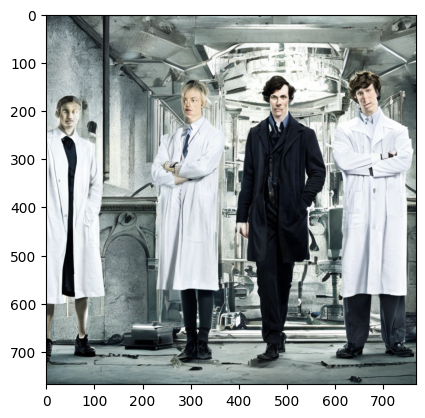

In [20]:
plt.imshow(gen_img_api)